In [121]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import custom_classes as cc

In [122]:
data_full = np.array([])
with open('data_ANN_full.csv') as datafile:
    reader = csv.reader(datafile)
    for row in reader:
        data_full = np.append(data_full, row)
data_full = data_full.reshape(23, 20045)

data_full_names = np.array([])
with open('data_ANN_full_names.csv') as datafile:
    reader = csv.reader(datafile)
    for row in reader:
        data_full_names = np.append(data_full_names, row)

In [123]:
data_zip = zip(data_full_names, data_full)
data = dict(data_zip)

In [124]:
cc.print_numbered(data_full_names)

0	T2
1	T4p
2	Т5cp
3	P4
4	P4p
5	P`2
6	T0cp
7	T`2
8	dP0.2
9	B
10	P2.1
11	GT1
12	Gv
13	dP0.1
14	P2.2
15	dPpg
16	P5
17	EngineSpeed
18	MainGenPower
19	TurbineExitTemp
20	CompressorInTemp
21	FuelInletPres
22	OutputPower


## Модель регулятора

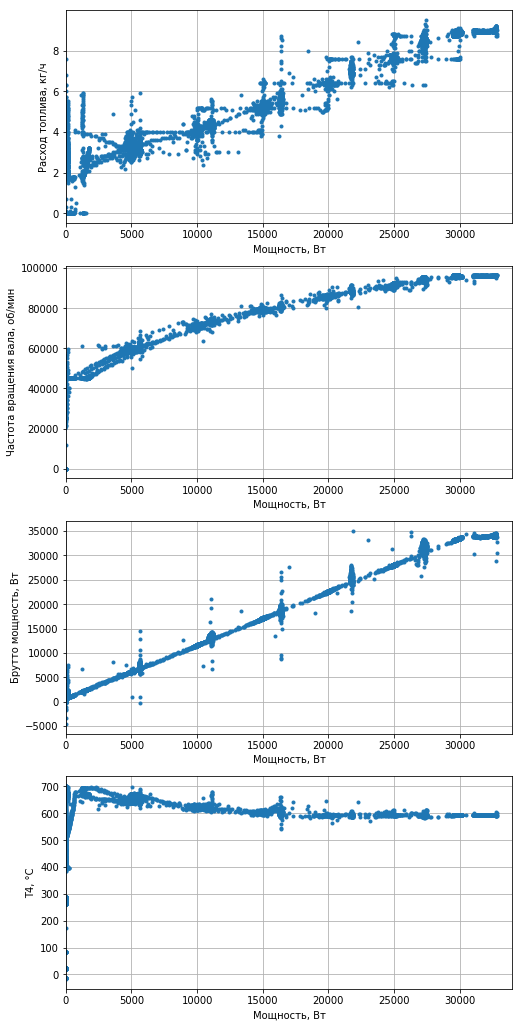

In [109]:
#f = plt.figure()
f, ax = plt.subplots(4, 1, figsize=(8,18))
ax[0].plot(data['OutputPower'], data['GT1'], '.')
ax[1].plot(data['OutputPower'], data['EngineSpeed'], '.')
ax[2].plot(data['OutputPower'], data['MainGenPower'], '.')
ax[3].plot(data['OutputPower'], data['TurbineExitTemp'], '.')
for axes, ylabel in zip(
    ax, ['Расход топлива, кг/ч', 'Частота вращения вала, об/мин',
    'Брутто мощность, Вт', 'Т4, °C']):
    axes.grid()
    axes.set_xlim(0, 34000)
    axes.set_xlabel('Мощность, Вт')
    axes.set_ylabel(ylabel)
plt.show()

## Модель имитатора

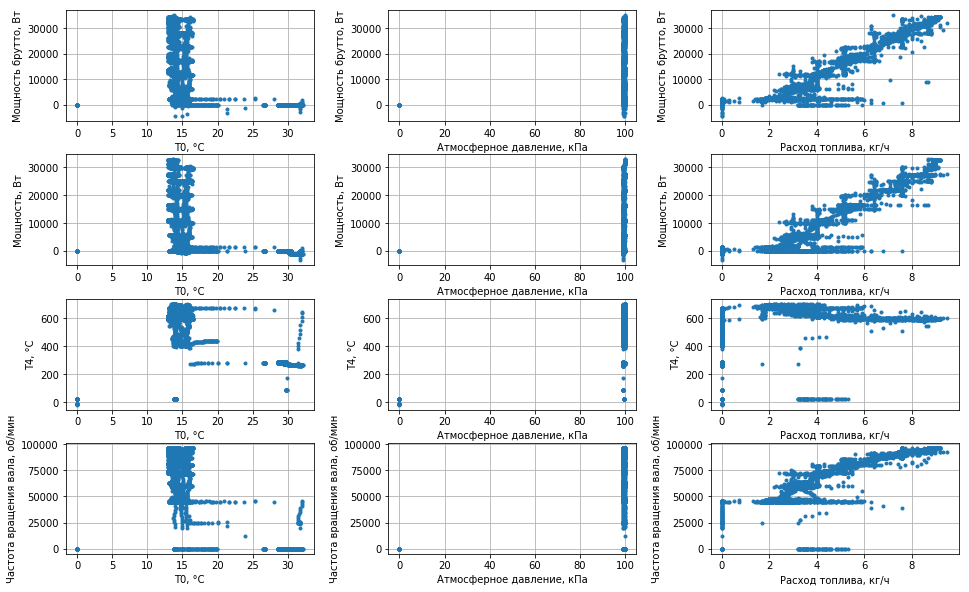

In [114]:
f, ax = plt.subplots(4, 3, figsize=(16, 10))
row = 0
col = 0
for func, funclabel in zip([
    data['MainGenPower'], data['OutputPower'],
    data['TurbineExitTemp'], data['EngineSpeed']],
    ['Мощность брутто, Вт', 'Мощность, Вт',
    'Т4, °C', 'Частота вращения вала, об/мин']):
    for arg, arglabel in zip([
        data['T0cp'], data['B'], data['GT1']],
        ['T0, °C', 'Атмосферное давление, кПа',
        'Расход топлива, кг/ч']):
        ax[row, col].plot(arg, func, '.')
        ax[row, col].grid()
        ax[row, col].set_xlabel(arglabel)
        ax[row, col].set_ylabel(funclabel)
        col += 1
    row += 1
    col = 0
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [57]:
%ls

ANN_classes.py*              cook_data.ipynb          model_exp/
ANN_testbook.ipynb           custom_classes.py        model_sym/
ANN_tests.py*                data_ANN_full.csv        model.xlsx
ann_tf_classes.py            data_ANN_full_names.csv  pic/
ann_train.py                 data_m.csv               __pycache__/
ANN_vector_GitVersion.ipynb  get_csv_data.py          tbrd_ann/
CHANGELOG                    model_contr/
